In [ ]:
import numpy as np
from tensorflow import keras
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = '/content/drive/MyDrive/Rosa/megaRosa.csv'

In [ ]:
rosa = pd.read_csv(file)
rosa

,Text
0,it’s always my joy to see you happy each and e...
1,i want you to showered me with care and love a...
2,and i wish we will always be together forever ...
3,i love you so much more than you could ever im...
4,can you imagine how times fly… it seems like y...
...,...
1607,. You are the poem I never knew how to write ...
1608,. We fit together in ways that others cannot ...
1609,. A sky full of stars and he was staring at h...
1610,. If you want to run to a quiet place at the ...


In [ ]:
with open(file, encoding='utf-8') as f:
    Corpus = f.readlines()  
Corpus = ' '.join(Corpus).lower().split('\n')

Corpus

['text',
 ' it’s always my joy to see you happy each and every day. i desire to make you mine and get to feel your subtle touch; your pretty lips and all your body.',
 ' i want you to showered me with care and love as you express your feelings for me.',
 ' and i wish we will always be together forever and until the end of time.',
 ' i love you so much more than you could ever imagine.',
 ' "can you imagine how times fly… it seems like yesterday, but it’s been more than a year ago since you crossed my path and came into my life."',
 ' not a single thing that i don’t admire about you as everything about you is very unique to me.',
 ' "from your compassionate heart to your glowing face, your charming smile, your pretty lips – i love everything."',
 ' all i craved for is see and make you feel better and happier each and every day.',
 ' i love you beyond words.',
 ' it’s those very small things about you i treasure so much more. i love your charming and sweet voice; i love your glowing and 

In [ ]:
print('Corpus Length:', len(Corpus))

Corpus Length: 1882


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Corpus)
totalWords = len(tokenizer.word_index) + 1
print(totalWords)

2774


In [ ]:
sequences = []
for line in Corpus:
    tokenList = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokenList)):
        ngramSequence = tokenList[:i+1]
        sequences.append(ngramSequence)

In [ ]:
sequences[:5]

[[88, 34],
 [88, 34, 5],
 [88, 34, 5, 162],
 [88, 34, 5, 162, 7],
 [88, 34, 5, 162, 7, 74]]

In [ ]:
def padSequences(sequences):
    maxSequenceLen = max([len(seq) for seq in sequences])
    sequences = np.array(pad_sequences(sequences, maxlen=maxSequenceLen, padding='pre'))
    
    predictors, label = sequences[:,:-1], sequences[:,-1]
    label = to_categorical(label, num_classes=totalWords)
    return predictors, label, maxSequenceLen

predictors, label, maxSequenceLen = padSequences(sequences)

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(totalWords, 64, input_length=maxSequenceLen - 1))
model.add(layers.LSTM(128))
model.add(layers.Dense(totalWords, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 316, 64)           177536    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 2774)              357846    
Total params: 634,198
Trainable params: 634,198
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [15]:
history = model.fit(predictors, label, epochs=100, 
                    callbacks=[EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)])

Epoch 1/100
1393/1393 [==============================] - 49s 19ms/step - loss: 5.8681 - accuracy: 0.0749
Epoch 2/100
1393/1393 [==============================] - 27s 19ms/step - loss: 4.8777 - accuracy: 0.1483
Epoch 3/100
1393/1393 [==============================] - 27s 19ms/step - loss: 4.2965 - accuracy: 0.2125
Epoch 4/100
1393/1393 [==============================] - 27s 19ms/step - loss: 3.8499 - accuracy: 0.2545
Epoch 5/100
1393/1393 [==============================] - 27s 19ms/step - loss: 3.4948 - accuracy: 0.2969
Epoch 6/100
1393/1393 [==============================] - 26s 19ms/step - loss: 3.1764 - accuracy: 0.3376
Epoch 7/100
1393/1393 [==============================] - 26s 19ms/step - loss: 2.8759 - accuracy: 0.3789
Epoch 8/100
1393/1393 [==============================] - 26s 19ms/step - loss: 2.6377 - accuracy: 0.4250
Epoch 9/100
1393/1393 [==============================] - 26s 19ms/step - loss: 2.4024 - accuracy: 0.4709
Epoch 10/100
1393/1393 [==============================]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Loss/Accuracy of the Language Model')

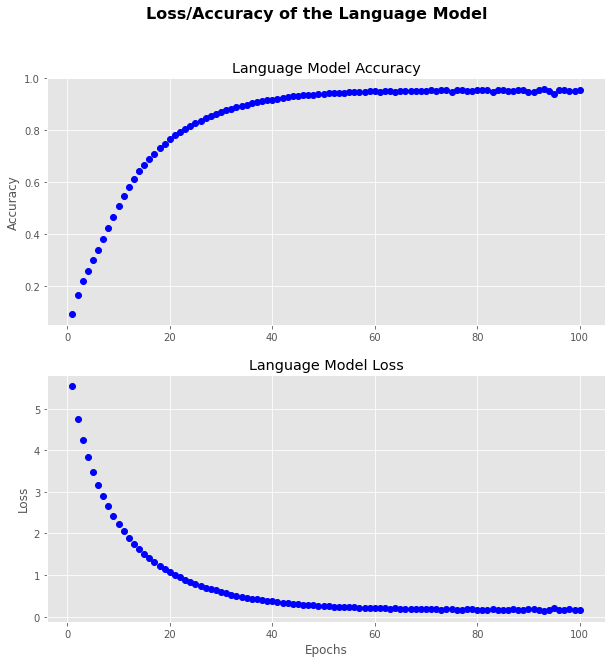

In [17]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Accuracy')
plot = ax2.plot(epochs, loss, 'bo', label='Loss')
ax1.set(title='Language Model Accuracy', ylabel='Accuracy')
ax2.set(title='Language Model Loss', xlabel='Epochs', ylabel='Loss')

fig.suptitle('Loss/Accuracy of the Language Model', fontsize=16, fontweight = 'bold')

In [37]:
def generateText(seed):   #A text seed is provided
    for wordLength in range(45):   #Generates a text with a range of word length
        tokenList = tokenizer.texts_to_sequences([seed])[0]  #Turns the seed into sequences
        tokenList = pad_sequences([tokenList], maxlen=maxSequenceLen - 1, padding='pre')
        predicted = model.predict_classes(tokenList, verbose=0) #Predicts the next sequence(generated
        outputWord = " "                                         #text)  
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                outputWord = word
                break
        seed += " " + outputWord     #Returns the seed plus generated text
    return seed

In [38]:
generateText('my love')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'my love for you is deeper than the ocean you can see it if you look right into my eyes you’ll know how madly i’m in love with you you are not that you’re all i think about i see a long way more than the distance'

In [39]:
generateText('Honey')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Honey i just want to let you know that i’ll always be around regardless of the tough situations this love will last forever so please allow me to love you more than i already do baby you because i am sold in a lot when i'

In [40]:
generateText('Bumble bee')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Bumble bee a doctor would be baffled at how my heart conveniently decides to beat faster or slower – depending on whether i’m thinking about you or not xoxo if these sample love letters for her can give your love or the continue to push all the'

In [42]:
generateText('mi Love')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'mi Love can never be measured it can only be felt you have painted my life with the colors of heaven i don’t want anything else as long as your love is with me forever now i love you so much honey and i just wanted to'

In [43]:
generateText('my Heartbeat')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'my Heartbeat you make me feel happy and i have ever known before i met and hard i get this one else can always be my wish it’s let you it’s always there for me i love you darling when i wake up a lot when i'

In [44]:
generateText('Loofu mi')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Loofu mi i love you more than i did yesterday but not more than i will tomorrow ❤ on for a thousand will more i love you more than every day could always mean more than the most heartfelt growing in my dreams and i am ready'

In [45]:
model.save('./rosaLove.h5')
model = keras.models.load_model('./rosaLove.h5')